In [292]:
# Solving xor problem
# 1 1 = 0
# 0 1 = 1
# 1 0 = 1
# 0 0 = 0

In [293]:
import numpy as np
import matplotlib.pyplot as pl

In [294]:
# Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x ))

In [295]:
# Sigmoid derivatives
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [296]:
# Forward Function
# Here np.matmul() and np.dot() is same
def forward(x,w1,w2,predict=False):
    a1=np.matmul(x,w1)
    z1=sigmoid(a1)
#   Create and add Bias
    bias=np.ones((len(z1),1))
    z1=np.concatenate((bias,z1),axis=1)
    a2=np.matmul(z1,w2)
    z2=sigmoid(a2)
    if predict:
        return z2
    return a1,z1,a2,z2

In [297]:
def back_prop(a1,z0,z1,z2,y):
    delta2=z2-y
    Delta2=np.matmul(z1.T,delta2)
    delta1=(delta2.dot(w2[1:,:].T)*sigmoid_derivative(a1))
    Delta1=np.matmul(z0.T,delta1)
    return delta2,Delta1,Delta2

In [298]:
# first column is Bias
x=np.array([[1,1,0],[1,0,1],[1,0,0],[1,1,1]])
x

array([[1, 1, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 1]])

In [299]:
# Output label
y=np.array([[1],[1],[0],[0]])
y

array([[1],
       [1],
       [0],
       [0]])

In [300]:
# initialize weights
np.random.seed(1)
w1=np.random.randn(3,5)
w2=np.random.randn(6,1)

In [301]:
lr=0.09
costs=[]
epochs=15000
m=len(x)

In [302]:
for i in range(epochs):
    a1,z1,a2,z2=forward(x,w1,w2)
    delta2,Delta1,Delta2=back_prop(a2,x,z1,z2,y)
    w1-=lr*(1/m)*Delta1
    w2-=lr*(1/m)*Delta2
    c=np.mean(np.abs(delta2))
    costs.append(c)
    if i%1000==0:
        print(f"Iteration:{i}.Error:{c}")
print("Training complete")

Iteration:0.Error:0.5018721437293049
Iteration:1000.Error:0.48070161499227126
Iteration:2000.Error:0.48342775757060497
Iteration:3000.Error:0.482892326359894
Iteration:4000.Error:0.47769031498006786
Iteration:5000.Error:0.4722496858788187
Iteration:6000.Error:0.4668996057701478
Iteration:7000.Error:0.4616329322502836
Iteration:8000.Error:0.4564396679732647
Iteration:9000.Error:0.451313812135239
Iteration:10000.Error:0.44625213888864385
Iteration:11000.Error:0.4412530937753039
Iteration:12000.Error:0.4363160621663077
Iteration:13000.Error:0.4314409208483508
Iteration:14000.Error:0.426627773727062
Training complete


In [310]:
z3=forward(x,w1,w2,True)
print("Percentages:")
print(z3)
print("Prediction:")
print(np.round(z3))

Percentages:
[[0.57813856]
 [0.57813307]
 [0.42196833]
 [0.42181051]]
Prediction:
[[1.]
 [1.]
 [0.]
 [0.]]


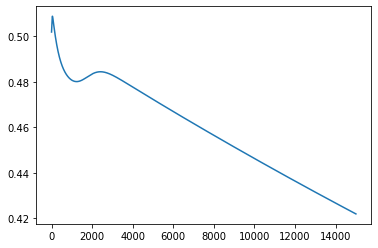

In [304]:
pl.plot(costs)
pl.show()